# Liver Series - Part 4
In this fourth installment we will be performing correlation analysis. From part 2 of our series, we know that the variables AgeYrs, Platelet, and Albumin approximates the gaussian curve. For these 3, we will use the Pearson correlation, and use Spearman correlation with the rest. 

In [1]:
# Import the necessary libraries needed
import pandas as pd
import scipy.stats as scst
import seaborn as sns
import matplotlib.pyplot as plt

## Import the dataset

In [2]:
pbc = pd.read_csv('primary biliary cirrhosis RCT mod1.csv')
pbc.head()

,PatientID,DaySurvival,Status,Treatment,AgeYrs,Sex,Ascites,Hepatomegaly,SpiderAngiomata,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglyceride,Platelet,Protime,HistologyStage
0,1,400,censored,penicillamine,58.77,F,yes,yes,yes,present,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,dead,penicillamine,56.45,F,no,yes,yes,absent,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,censored,penicillamine,70.07,M,no,no,no,diurese,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,censored,penicillamine,54.74,F,no,yes,yes,diurese,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,transplant,placebo,38.11,F,no,yes,yes,absent,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## Address the NA values

In [3]:
# We will then drop all the null values that coincides with the Treatment variable, 
#just like what we did in Part 2.

pbc = pbc.dropna(subset=['Treatment'])

# Then the remaining variables that still have null values are 
#continuous variables: Cholesterol, Copper, Triglyceride, and Platelet.
# This will be replaced by the mean for each variable.

pbc['Cholesterol'].fillna(value=pbc['Cholesterol'].mean(), inplace=True)
pbc['Copper'].fillna(value=pbc['Copper'].mean(), inplace=True)
pbc['Triglyceride'].fillna(value=pbc['Triglyceride'].mean(), inplace=True)
pbc['Platelet'].fillna(value=pbc['Platelet'].mean(), inplace=True)

## Create the subset

In [4]:
# Parametric
AgeYrs =  pbc['AgeYrs']
Platelet = pbc['Platelet']
Albumin = pbc['Albumin']

# Nonparametric
DaySurvive = pbc['DaySurvival']
Bili = pbc['Bilirubin']
Protime = pbc['Protime']
TG = pbc['Triglyceride']
AST = pbc['AST']
ALP = pbc['ALP']
Cu = pbc['Copper']
Chole = pbc['Cholesterol']

# Pearson Correlation

## AgeYrs versus Platelet
* $H_0$: There is no correlation between the age (in years) and the platelet count of the patient.
* $H_0$: $r = 0$
* $H_1$: There is a correlation between the age (in years) and the platelet count of the patient.
* $H_1$: $r \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

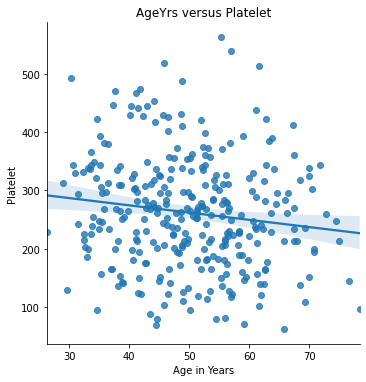

,Result
Pearson correlation,-0.138366
p-value,0.014445


In [5]:
# Visualize your data via scatterplot
sns.lmplot(x='AgeYrs', y='Platelet', data=pbc)
plt.title('AgeYrs versus Platelet')
plt.xlabel('Age in Years')
plt.ylabel('Platelet')

# Perform the Pearson correlation
r, pval = scst.pearsonr(AgeYrs, Platelet)
result = pd.DataFrame([r, pval], 
                      index=['Pearson correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.014 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is a **very weak negative correlation** between age and platelet count of the patient.

## AgeYrs versus Albumin
* $H_0$: There is no correlation between the age (in years) and the albumin level of the patient.
* $H_0$: $r = 0$
* $H_1$: There is a correlation between the age (in years) and the albumin level of the patient.
* $H_1$: $r \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

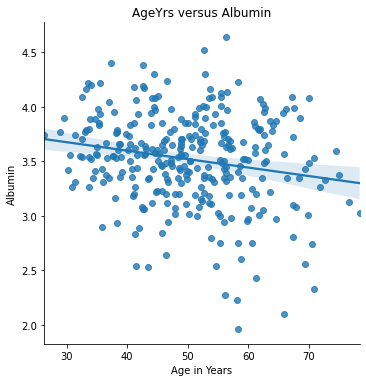

,Result
Pearson correlation,-0.195286
p-value,0.000522


In [6]:
# Visualize your data via scatterplot
sns.lmplot(x='AgeYrs', y='Albumin', data=pbc)
plt.title('AgeYrs versus Albumin')
plt.xlabel('Age in Years')
plt.ylabel('Albumin')

# Perform the Pearson correlation
r, pval = scst.pearsonr(AgeYrs, Albumin)
result = pd.DataFrame([r, pval], 
                      index=['Pearson correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.000522 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is a **very weak to weak negative correlation** between age and albumin level of the patient.

## Platelet versus Albumin
* $H_0$: There is no correlation between the platelet count and the albumin level of the patient.
* $H_0$: $r = 0$
* $H_1$: There is a correlation between the platelet count and the albumin level of the patient.
* $H_1$: $r \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

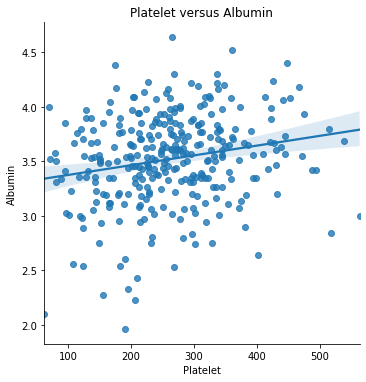

,Result
Pearson correlation,0.202989
p-value,0.000308


In [7]:
# Visualize your data via scatterplot
sns.lmplot(x='Platelet', y='Albumin', data=pbc)
plt.title('Platelet versus Albumin')
plt.xlabel('Platelet')
plt.ylabel('Albumin')

# Perform the Pearson correlation
r, pval = scst.pearsonr(Platelet, Albumin)
result = pd.DataFrame([r, pval], 
                      index=['Pearson correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.000308 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is a **weak positive correlation** between platelet count and albumin level of the patient.

# Spearman Correlation

## DaySurvival versus Bilirubin
* $H_0$: There is no correlation between the days survived and the bilirubin level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the days survived and the bilirubin level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

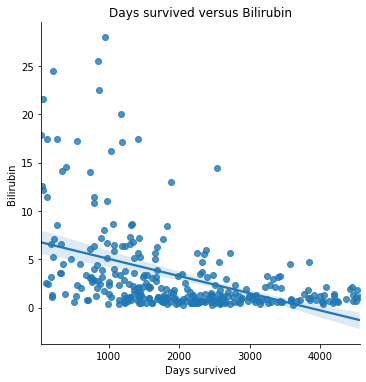

,Result
Spearman correlation,-5.041226e-01
p-value,1.626686e-21


In [8]:
# Visualize your data via scatterplot
sns.lmplot(x='DaySurvival', y='Bilirubin', data=pbc)
plt.title('Days survived versus Bilirubin')
plt.xlabel('Days survived')
plt.ylabel('Bilirubin')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(DaySurvive, Bili)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 1.63e-21 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is a **moderate negative correlation** between days survived and bilirubin level of the patient.

## DaySurvival versus Protime
* $H_0$: There is no correlation between the days survived and the protime of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the days survived and the protime of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

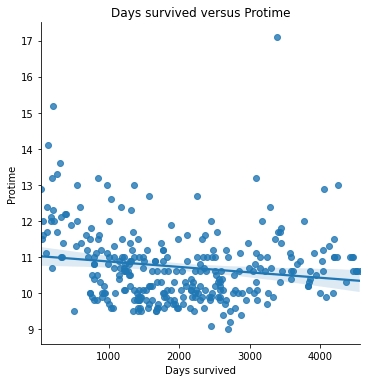

,Result
Spearman correlation,-0.173659
p-value,0.002080


In [9]:
# Visualize your data via scatterplot
sns.lmplot(x='DaySurvival', y='Protime', data=pbc)
plt.title('Days survived versus Protime')
plt.xlabel('Days survived')
plt.ylabel('Protime')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(DaySurvive, Protime)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.002080 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is a **very weak negative correlation** between days survived and protime of the patient.

## DaySurvival versus Triglyceride
* $H_0$: There is no correlation between the days survived and the triglyceride level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the days survived and the  triglyceride level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

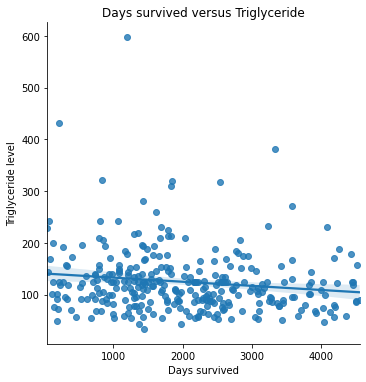

,Result
Spearman correlation,-0.167109
p-value,0.003069


In [10]:
# Visualize your data via scatterplot
sns.lmplot(x='DaySurvival', y='Triglyceride', data=pbc)
plt.title('Days survived versus Triglyceride')
plt.xlabel('Days survived')
plt.ylabel('Triglyceride level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(DaySurvive, TG)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.003069 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is a **very weak negative correlation** between days survived and triglyceride level of the patient.

## DaySurvival versus Aspartate aminotransferase
* $H_0$: There is no correlation between the days survived and the AST level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the days survived and the  AST level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

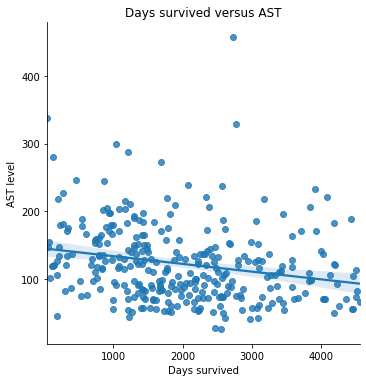

,Result
Spearman correlation,-2.796420e-01
p-value,5.163249e-07


In [11]:
# Visualize your data via scatterplot
sns.lmplot(x='DaySurvival', y='AST', data=pbc)
plt.title('Days survived versus AST')
plt.xlabel('Days survived')
plt.ylabel('AST level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(DaySurvive, AST)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 5.16e-7 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is a **weak negative correlation** between days survived and AST level of the patient.

## DaySurvival versus Alkaline phosphatase
* $H_0$: There is no correlation between the days survived and the ALP level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the days survived and the  ALP level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

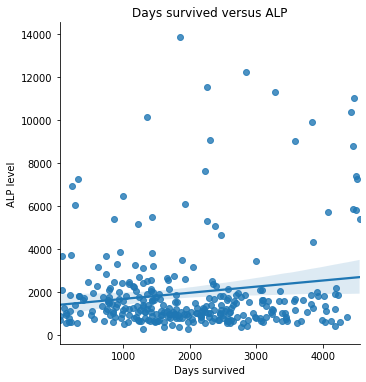

,Result
Spearman correlation,-0.032771
p-value,0.564154


In [12]:
# Visualize your data via scatterplot
sns.lmplot(x='DaySurvival', y='ALP', data=pbc)
plt.title('Days survived versus ALP')
plt.xlabel('Days survived')
plt.ylabel('ALP level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(DaySurvive, ALP)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.56 $>$ $\alpha = 0.05$
<br> We will **not reject** our null hypothesis.
<br> There is **no correlation** between days survived and ALP level of the patient.

## DaySurvival versus Copper level
* $H_0$: There is no correlation between the days survived and the copper level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the days survived and the  copper level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

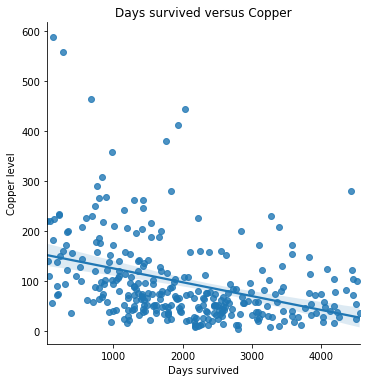

,Result
Spearman correlation,-4.306236e-01
p-value,1.619008e-15


In [13]:
# Visualize your data via scatterplot
sns.lmplot(x='DaySurvival', y='Copper', data=pbc)
plt.title('Days survived versus Copper')
plt.xlabel('Days survived')
plt.ylabel('Copper level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(DaySurvive, Cu)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 1.619e-15 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **moderate negative correlation** between days survived and copper level of the patient.

## DaySurvival versus Cholesterol
* $H_0$: There is no correlation between the days survived and the cholesterol level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the days survived and the  cholesterol level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

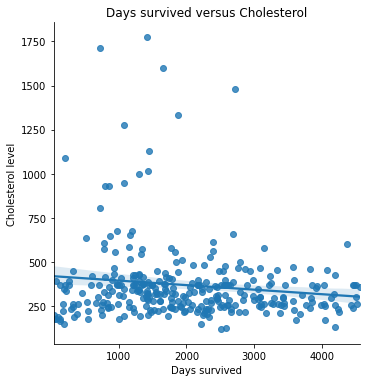

,Result
Spearman correlation,-0.083267
p-value,0.142259


In [14]:
# Visualize your data via scatterplot
sns.lmplot(x='DaySurvival', y='Cholesterol', data=pbc)
plt.title('Days survived versus Cholesterol')
plt.xlabel('Days survived')
plt.ylabel('Cholesterol level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(DaySurvive, Chole)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.142259 $>$ $\alpha = 0.05$
<br> We will **not reject** our null hypothesis.
<br> There is **no correlation** between days survived and cholesterol level of the patient.

## Bilirubin versus Protime
* $H_0$: There is no correlation between the bilirubin level and protime of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the bilirubin level and protime of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

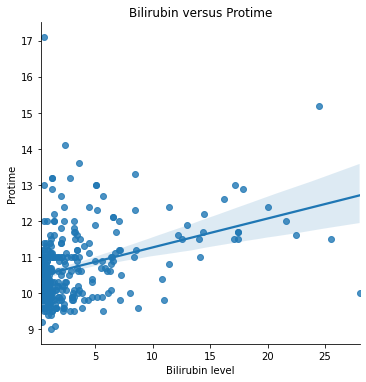

,Result
Spearman correlation,3.015478e-01
p-value,5.573247e-08


In [15]:
# Visualize your data via scatterplot
sns.lmplot(x='Bilirubin', y='Protime', data=pbc)
plt.title('Bilirubin versus Protime')
plt.xlabel('Bilirubin level')
plt.ylabel('Protime')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Bili, Protime)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 5.57e-8 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between bilirubin level and protime of the patient.

## Bilirubin versus Triglyceride
* $H_0$: There is no correlation between the bilirubin level and triglyceride level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the bilirubin level and triglyceride level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

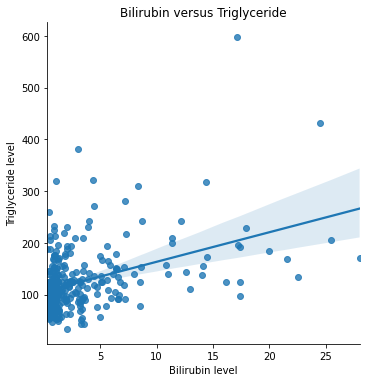

,Result
Spearman correlation,3.417393e-01
p-value,5.655846e-10


In [16]:
# Visualize your data via scatterplot
sns.lmplot(x='Bilirubin', y='Triglyceride', data=pbc)
plt.title('Bilirubin versus Triglyceride')
plt.xlabel('Bilirubin level')
plt.ylabel('Triglyceride level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Bili, TG)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 5.656e-10 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between bilirubin level and triglyceride level of the patient.

## Bilirubin versus Aspartate aminotransferase
* $H_0$: There is no correlation between the bilirubin level and AST level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the bilirubin level and AST level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

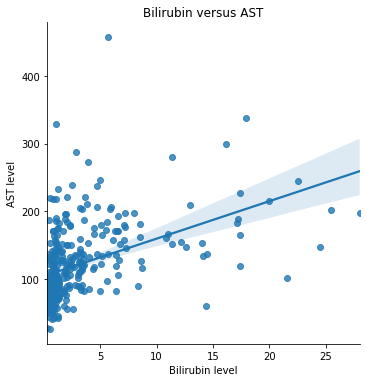

,Result
Spearman correlation,5.863200e-01
p-value,3.378529e-30


In [17]:
# Visualize your data via scatterplot
sns.lmplot(x='Bilirubin', y='AST', data=pbc)
plt.title('Bilirubin versus AST')
plt.xlabel('Bilirubin level')
plt.ylabel('AST level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Bili, AST)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 3.38e-30 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **moderate positive correlation** between bilirubin level and AST level of the patient.

## Bilirubin versus Alkaline phosphatase
* $H_0$: There is no correlation between the bilirubin level and ALP level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the bilirubin level and ALP level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

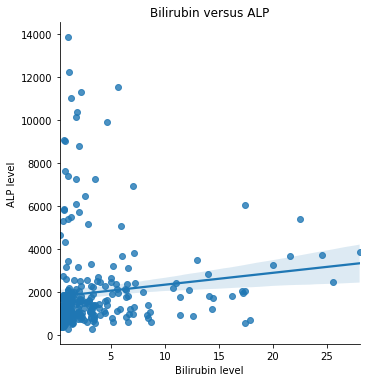

,Result
Spearman correlation,3.576980e-01
p-value,7.541441e-11


In [18]:
# Visualize your data via scatterplot
sns.lmplot(x='Bilirubin', y='ALP', data=pbc)
plt.title('Bilirubin versus ALP')
plt.xlabel('Bilirubin level')
plt.ylabel('ALP level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Bili, ALP)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 7.54e-11 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between bilirubin level and AST level of the patient.

## Bilirubin versus Copper level
* $H_0$: There is no correlation between the bilirubin level and copper level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the bilirubin level and copper level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

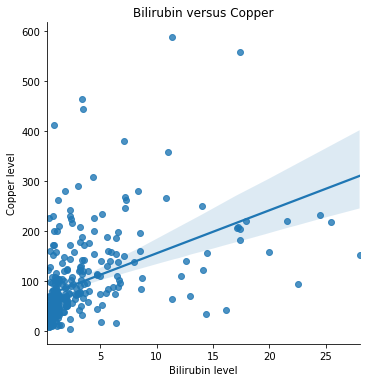

,Result
Spearman correlation,6.232615e-01
p-value,5.694939e-35


In [19]:
# Visualize your data via scatterplot
sns.lmplot(x='Bilirubin', y='Copper', data=pbc)
plt.title('Bilirubin versus Copper')
plt.xlabel('Bilirubin level')
plt.ylabel('Copper level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Bili, Cu)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 5.69e-35 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **strong positive correlation** between bilirubin level and copper level of the patient.

## Bilirubin versus Cholesterol level
* $H_0$: There is no correlation between the bilirubin level and cholesterol level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the bilirubin level and cholesterol level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

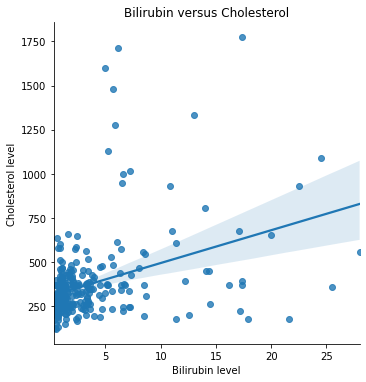

,Result
Spearman correlation,3.758016e-01
p-value,6.668438e-12


In [20]:
# Visualize your data via scatterplot
sns.lmplot(x='Bilirubin', y='Cholesterol', data=pbc)
plt.title('Bilirubin versus Cholesterol')
plt.xlabel('Bilirubin level')
plt.ylabel('Cholesterol level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Bili, Chole)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 6.668e-12 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between bilirubin level and cholesterol level of the patient.

## Protime versus Triglyceride level
* $H_0$: There is no correlation between the protime and triglyceride level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the protime and triglyceride level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

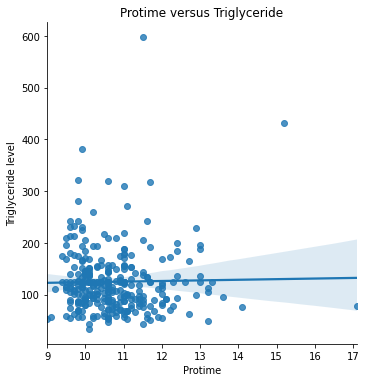

,Result
Spearman correlation,-0.086960
p-value,0.125334


In [21]:
# Visualize your data via scatterplot
sns.lmplot(x='Protime', y='Triglyceride', data=pbc)
plt.title('Protime versus Triglyceride')
plt.xlabel('Protime')
plt.ylabel('Triglyceride level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Protime, TG)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.125334 $>$ $\alpha = 0.05$
<br> We will **not reject** our null hypothesis.
<br> There is **no correlation** between protime and triglyceride level of the patient.

## Protime versus Aspartate aminotransferase
* $H_0$: There is no correlation between the protime and AST of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the protime and AST of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

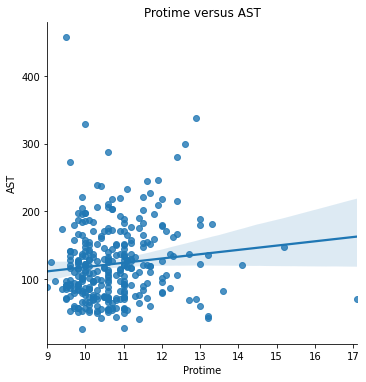

,Result
Spearman correlation,0.136189
p-value,0.016078


In [22]:
# Visualize your data via scatterplot
sns.lmplot(x='Protime', y='AST', data=pbc)
plt.title('Protime versus AST')
plt.xlabel('Protime')
plt.ylabel('AST')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Protime, AST)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.016078 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **very weak positive correlation** between protime and AST of the patient.

## Protime versus Aklaline phosphatase
* $H_0$: There is no correlation between the protime and ALP of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the protime and ALP of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

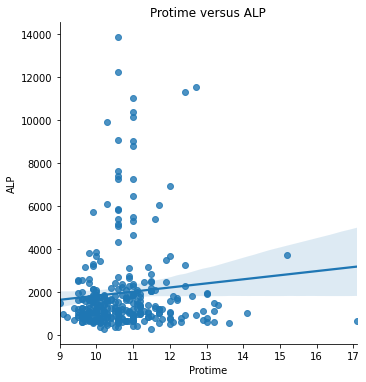

,Result
Spearman correlation,0.090527
p-value,0.110514


In [23]:
# Visualize your data via scatterplot
sns.lmplot(x='Protime', y='ALP', data=pbc)
plt.title('Protime versus ALP')
plt.xlabel('Protime')
plt.ylabel('ALP')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Protime, ALP)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.110514 $>$ $\alpha = 0.05$
<br> We will **not reject** our null hypothesis.
<br> There is **no correlation** between protime and ALP of the patient.

## Protime versus Copper level
* $H_0$: There is no correlation between the protime and copper level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the protime and copper level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

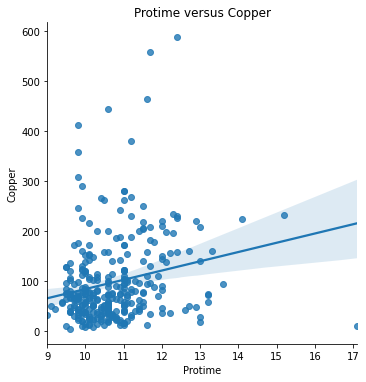

,Result
Spearman correlation,0.208151
p-value,0.000213


In [24]:
# Visualize your data via scatterplot
sns.lmplot(x='Protime', y='Copper', data=pbc)
plt.title('Protime versus Copper')
plt.xlabel('Protime')
plt.ylabel('Copper')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Protime, Cu)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.000213 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between protime and copper level of the patient.

## Protime versus Cholesterol
* $H_0$: There is no correlation between the protime and cholesterol level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the protime and cholesterol level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

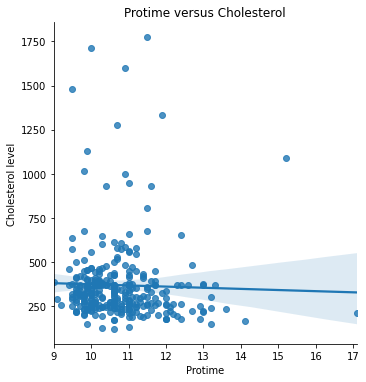

,Result
Spearman correlation,-0.129166
p-value,0.022493


In [25]:
# Visualize your data via scatterplot
sns.lmplot(x='Protime', y='Cholesterol', data=pbc)
plt.title('Protime versus Cholesterol')
plt.xlabel('Protime')
plt.ylabel('Cholesterol level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Protime, Chole)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.022493 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **very weak negative correlation** between protime and cholesterol level of the patient.

## Triglyceride versus Asparate aminotransferase
* $H_0$: There is no correlation between the triglyceride and AST of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the triglyceride and AST of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

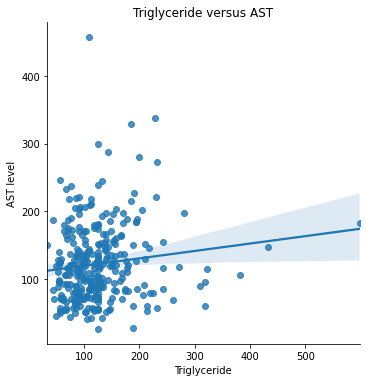

,Result
Spearman correlation,0.122992
p-value,0.029855


In [26]:
# Visualize your data via scatterplot
sns.lmplot(x='Triglyceride', y='AST', data=pbc)
plt.title('Triglyceride versus AST')
plt.xlabel('Triglyceride')
plt.ylabel('AST level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(TG, AST)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.029855 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **very weak positive correlation** between triglyceride and AST level of the patient.

## Triglyceride versus Alkaline phosphatase
* $H_0$: There is no correlation between the triglyceride and ALP of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the triglyceride and ALP of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

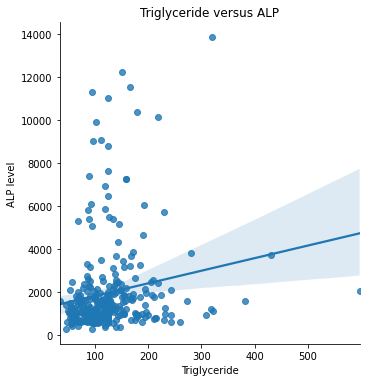

,Result
Spearman correlation,0.221249
p-value,0.000081


In [27]:
# Visualize your data via scatterplot
sns.lmplot(x='Triglyceride', y='ALP', data=pbc)
plt.title('Triglyceride versus ALP')
plt.xlabel('Triglyceride')
plt.ylabel('ALP level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(TG, ALP)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.000081 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between triglyceride and ALP level of the patient.

## Triglyceride versus Copper level
* $H_0$: There is no correlation between the triglyceride and copper level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the triglyceride and copper level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

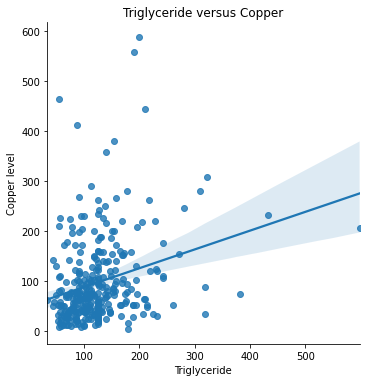

,Result
Spearman correlation,2.946372e-01
p-value,1.147988e-07


In [28]:
# Visualize your data via scatterplot
sns.lmplot(x='Triglyceride', y='Copper', data=pbc)
plt.title('Triglyceride versus Copper')
plt.xlabel('Triglyceride')
plt.ylabel('Copper level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(TG, Cu)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 1.148e-7 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between triglyceride and copper level of the patient.

## Triglyceride versus Cholesterol
* $H_0$: There is no correlation between the triglyceride and cholesterol of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the triglyceride and cholesterol of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

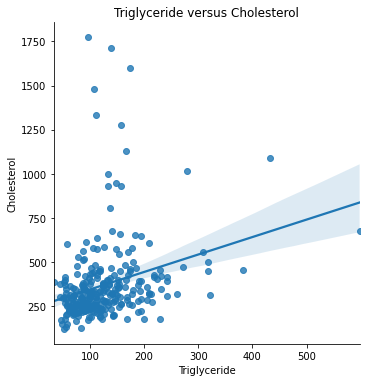

,Result
Spearman correlation,3.949886e-01
p-value,4.304238e-13


In [29]:
# Visualize your data via scatterplot
sns.lmplot(x='Triglyceride', y='Cholesterol', data=pbc)
plt.title('Triglyceride versus Cholesterol')
plt.xlabel('Triglyceride')
plt.ylabel('Cholesterol')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(TG, Chole)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 4.3e-13 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between triglyceride and cholesterol level of the patient.

## Aspartate aminotransferase versus Alkaline phosphatase
* $H_0$: There is no correlation between the AST and ALP of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the AST and ALP of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

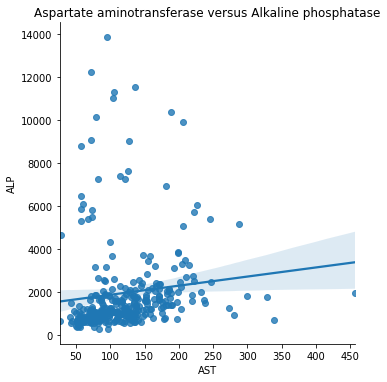

,Result
Spearman correlation,4.074364e-01
p-value,6.599292e-14


In [30]:
# Visualize your data via scatterplot
sns.lmplot(x='AST', y='ALP', data=pbc)
plt.title('Aspartate aminotransferase versus Alkaline phosphatase')
plt.xlabel('AST')
plt.ylabel('ALP')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(AST, ALP)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 6.599e-14 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **moderate positive correlation** between AST and ALP level of the patient.

## Aspartate aminotransferase versus Copper level
* $H_0$: There is no correlation between the AST and copper level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the AST and copper level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

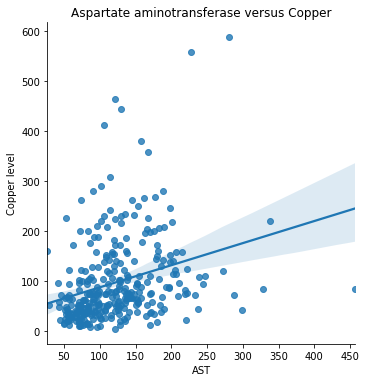

,Result
Spearman correlation,4.049638e-01
p-value,9.638015e-14


In [31]:
# Visualize your data via scatterplot
sns.lmplot(x='AST', y='Copper', data=pbc)
plt.title('Aspartate aminotransferase versus Copper')
plt.xlabel('AST')
plt.ylabel('Copper level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(AST, Cu)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 9.638e-14 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **moderate positive correlation** between AST and copper level of the patient.

## Aspartate aminotransferase versus Cholesterol level
* $H_0$: There is no correlation between the AST and cholesterol level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the AST and cholesterol level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

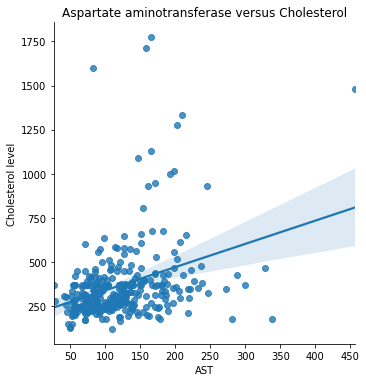

,Result
Spearman correlation,3.348187e-01
p-value,1.308743e-09


In [32]:
# Visualize your data via scatterplot
sns.lmplot(x='AST', y='Cholesterol', data=pbc)
plt.title('Aspartate aminotransferase versus Cholesterol')
plt.xlabel('AST')
plt.ylabel('Cholesterol level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(AST, Chole)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 1.31e-9 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between AST and cholesterol level of the patient.

## Alkaline phosphatase versus Copper level
* $H_0$: There is no correlation between the ALP and copper level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the ALP and copper level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

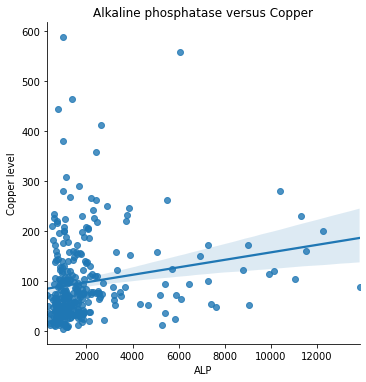

,Result
Spearman correlation,2.796629e-01
p-value,5.152800e-07


In [33]:
# Visualize your data via scatterplot
sns.lmplot(x='ALP', y='Copper', data=pbc)
plt.title('Alkaline phosphatase versus Copper')
plt.xlabel('ALP')
plt.ylabel('Copper level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(ALP, Cu)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 5.15e-7 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between ALP and copper level of the patient.

## Alkaline phosphatase versus Cholesterol level
* $H_0$: There is no correlation between the ALP and cholesterol level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the ALP and cholesterol level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

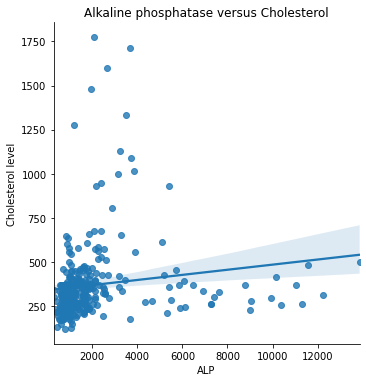

,Result
Spearman correlation,3.902628e-01
p-value,8.595228e-13


In [34]:
# Visualize your data via scatterplot
sns.lmplot(x='ALP', y='Cholesterol', data=pbc)
plt.title('Alkaline phosphatase versus Cholesterol')
plt.xlabel('ALP')
plt.ylabel('Cholesterol level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(ALP, Chole)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 8.595e-13 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **weak positive correlation** between ALP and cholesterol level of the patient.

## Copper versus Cholesterol level
* $H_0$: There is no correlation between the copper and cholesterol level of the patient.
* $H_0$: $\rho = 0$; $r_s = 0$
* $H_1$: There is a correlation between the copper and cholesterol level of the patient.
* $H_1$: $\rho \neq 0$; $ r_s \neq 0$
* $\alpha = 0.05$
* very strong correlation: 0.8 to 1
* strong correlation: 0.6 to 0.79
* moderate correlation: 0.4 to 0.59
* weak correlation: 0.2 to 0.39
* very weak correlation: 0 to 0.19

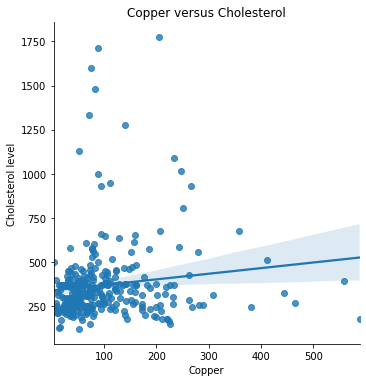

,Result
Spearman correlation,0.193892
p-value,0.000574


In [35]:
# Visualize your data via scatterplot
sns.lmplot(x='Copper', y='Cholesterol', data=pbc)
plt.title('Copper versus Cholesterol')
plt.xlabel('Copper')
plt.ylabel('Cholesterol level')

# Perform the Spearman correlation
rho, pval = scst.spearmanr(Cu, Chole)
result = pd.DataFrame([rho, pval], 
                      index=['Spearman correlation', 'p-value'],
                      columns=['Result'])
plt.show()
result

### Result and Interpretation
p-value = 0.000574 $<$ $\alpha = 0.05$
<br> We will **reject** our null hypothesis.
<br> There is **very weak positive correlation** between copper and cholesterol level of the patient.